In [16]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from src import mod_plot
from src import mod_switchvar

In [17]:

# Region name
region = 'GS' # 'GS', 'Med' or 'Cir' 


# A. 21D orbit SWOT data

## Read from regional data file "../swot_data/swot_21j_share_'region'.nc"

In [49]:
path_data = '../swot_data/swot_21j_share_'+region+'.nc' 

date_plot = np.datetime64('2023-09-12')

In [40]:
ds_SWOT = xr.open_mfdataset(path_data)


In [42]:
ds_SWOT = ds_SWOT.where(ds_SWOT.time>date_plot,drop=True)
ds_SWOT = ds_SWOT.where(ds_SWOT.time<date_plot+np.timedelta64(1,'D'),drop=True) 

## Plot noisy and baseline denoised SSH

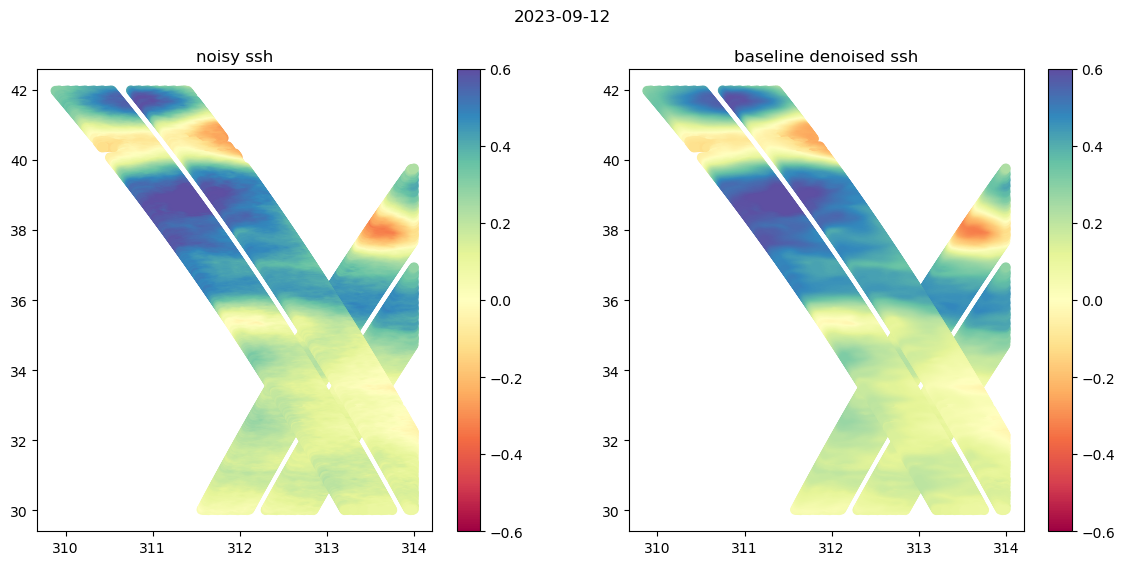

In [45]:
plt.figure(figsize=(14,6))
plt.suptitle(date_plot)

plt.subplot(121)
plt.title('Noisy ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=ds_SWOT.ssha_new_editing,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar()

plt.subplot(122)
plt.title('Unet baseline denoised ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=ds_SWOT.ssha_denoised_unet,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar() 

plt.savefig('../figures/plot_Unetbaseline_'+region+'_21d_'+str(date_plot)+'_ssh.png')

plt.show()

## Compute and plot SSH gradients and Laplacian

In [46]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)

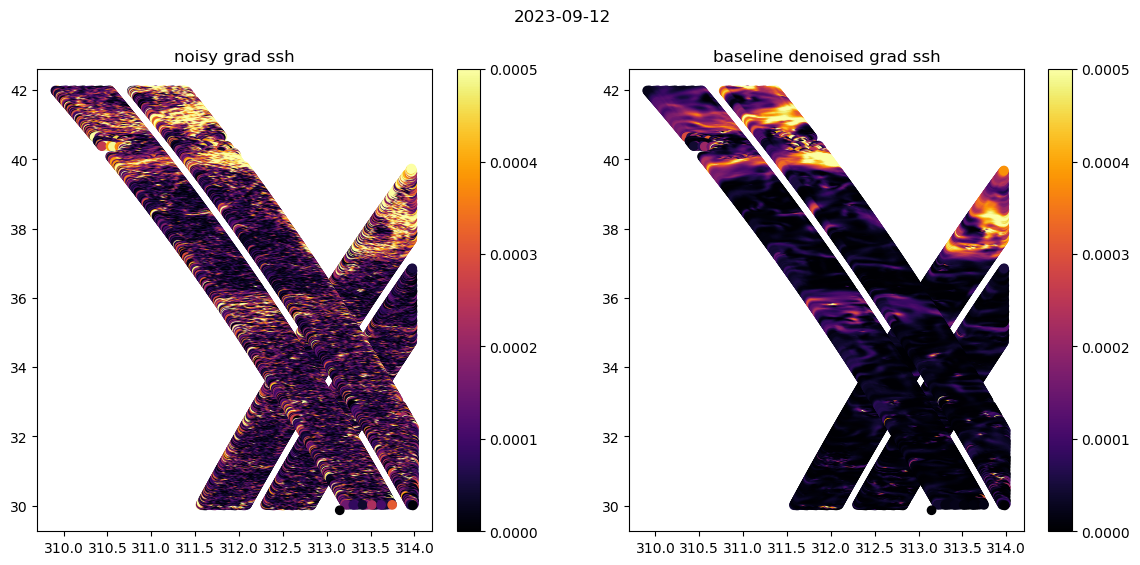

In [47]:
plt.figure(figsize=(14,6))
plt.suptitle(date_plot)

plt.subplot(121)
plt.title('noisy grad ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=grad_new_editing,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()

plt.subplot(122)
plt.title('baseline denoised grad ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=grad_denoised_unet,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()

plt.savefig('../figures/plot_Unetbaseline_'+region+'_21d_'+str(date_plot)+'_grad.png')

plt.show()

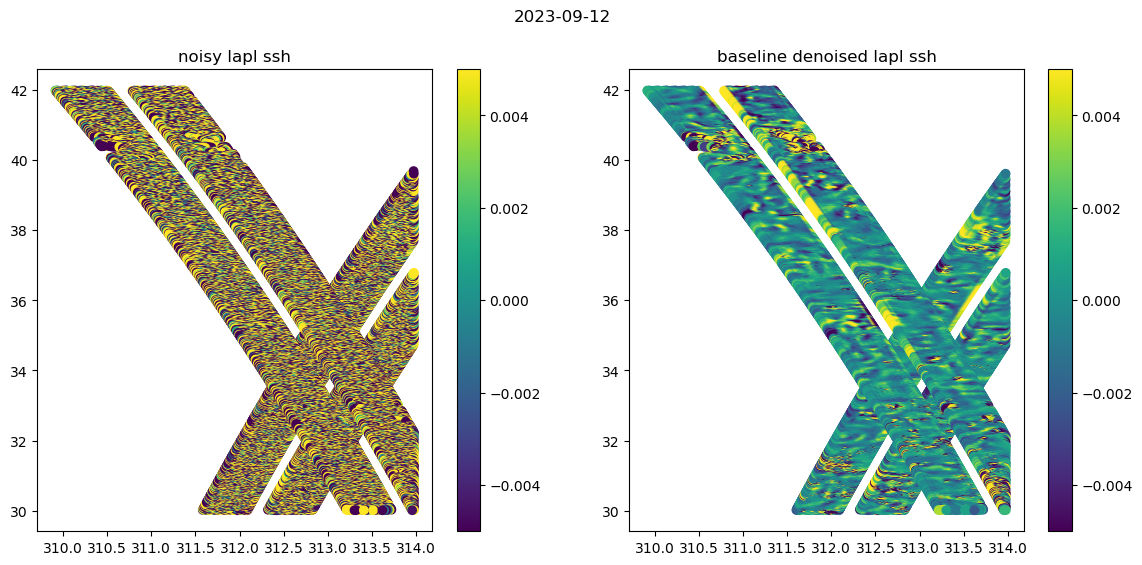

In [48]:
plt.figure(figsize=(14,6))
plt.suptitle(date_plot)

plt.subplot(121)
plt.title('noisy lapl ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=lapl_new_editing,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()

plt.subplot(122)
plt.title('baseline denoised lapl ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=lapl_denoised_unet,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()

plt.savefig('../figures/plot_Unetbaseline_'+region+'_21d_'+str(date_plot)+'_lapl.png')

plt.show()

# B. 1D orbit SWOT data

## Read from regional data file "../swot_data/swot_1j_share_'region'.nc"

In [50]:
path_data = '../swot_data/swot_1j_share_'+region+'.nc' 
 
date_plot = np.datetime64('2023-04-23')

In [51]:
ds_SWOT = xr.open_mfdataset(path_data)


In [52]:
ds_SWOT = ds_SWOT.where(ds_SWOT.time>date_plot,drop=True)
ds_SWOT = ds_SWOT.where(ds_SWOT.time<date_plot+np.timedelta64(1,'D'),drop=True) 

## Plot noisy and baseline denoised SSH

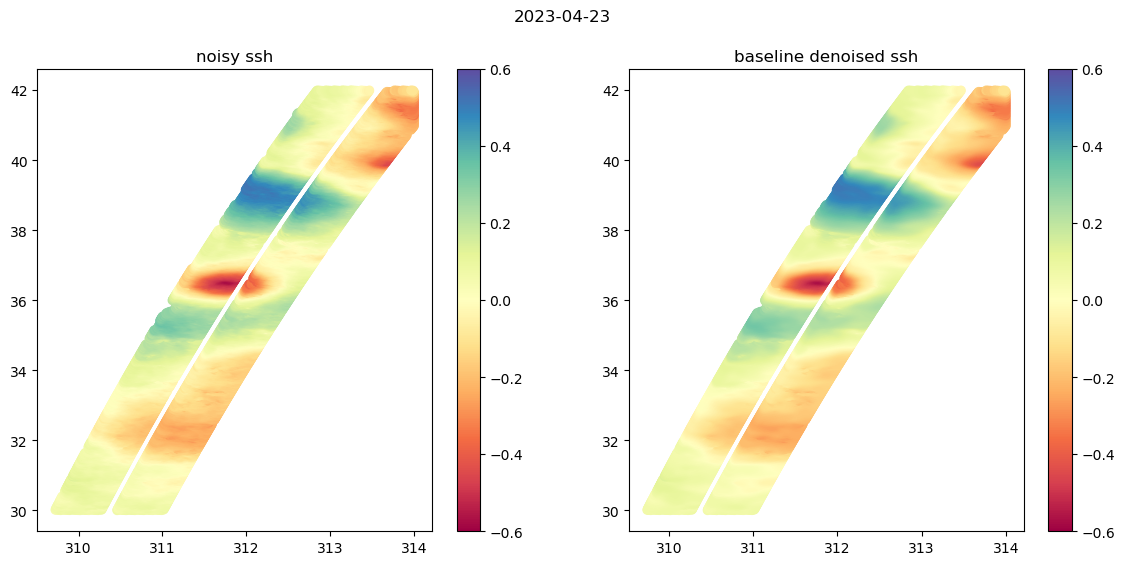

In [67]:
plt.figure(figsize=(14,6))
plt.suptitle(date_plot)

plt.subplot(121)
plt.title('noisy ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=ds_SWOT.ssha_new_editing,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar()

plt.subplot(122)
plt.title('baseline denoised ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=ds_SWOT.ssha_denoised_unet,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar() 

plt.savefig('../figures/plot_Unetbaseline_'+region+'_1d_'+str(date_plot)+'_ssh.png')

plt.show()


## Compute and plot SSH gradients and Laplacian

In [56]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)

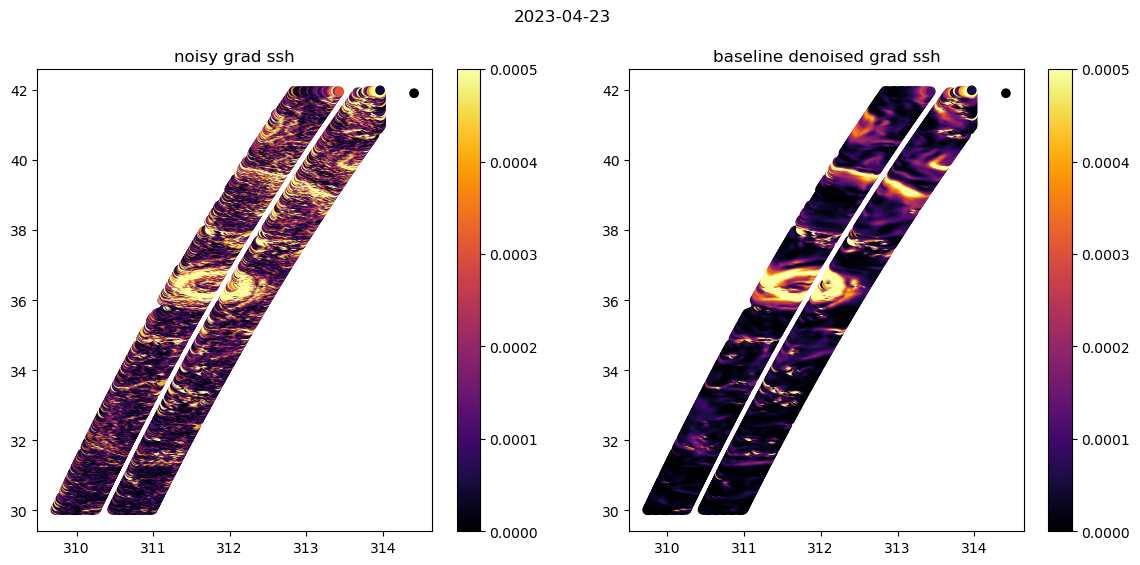

In [68]:
plt.figure(figsize=(14,6))
plt.suptitle(date_plot)

plt.subplot(121)
plt.title('noisy grad ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=grad_new_editing,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()

plt.subplot(122)
plt.title('baseline denoised grad ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=grad_denoised_unet,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()

plt.savefig('../figures/plot_Unetbaseline_'+region+'_1d_'+str(date_plot)+'_grad.png')

plt.show()

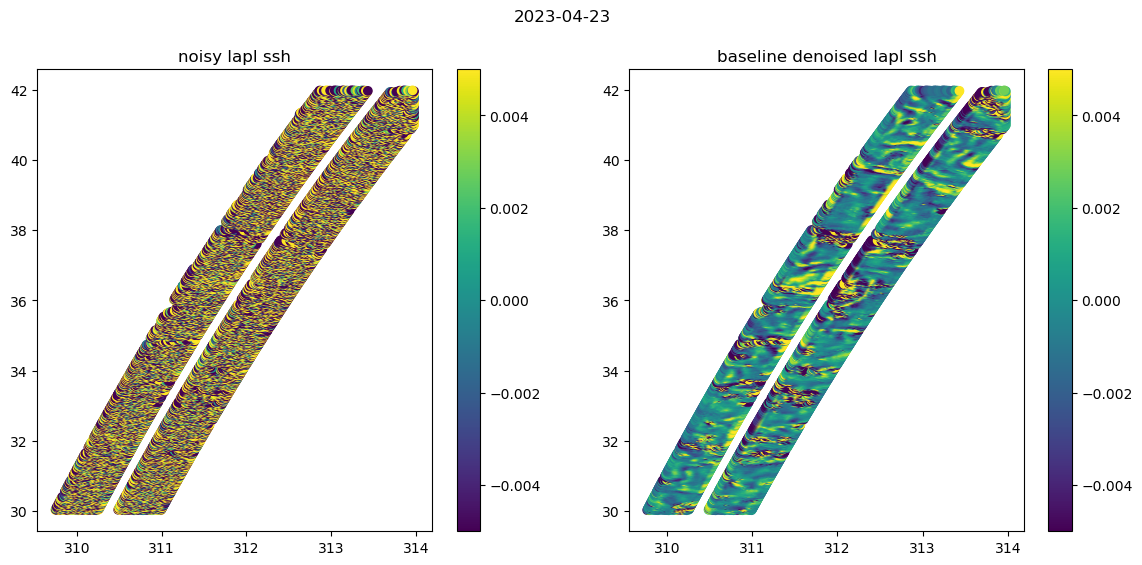

In [69]:
plt.figure(figsize=(14,6))
plt.suptitle(date_plot)

plt.subplot(121)
plt.title('noisy lapl ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=lapl_new_editing,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()

plt.subplot(122)
plt.title('baseline denoised lapl ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=lapl_denoised_unet,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()

plt.savefig('../figures/plot_Unetbaseline_'+region+'_1d_'+str(date_plot)+'_lapl.png')

plt.show()